# Imports

In [1]:
from skimage import color, io, measure
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import seaborn as sns
import pandas as pd
from sklearn import decomposition
import math
from skimage.filters import threshold_otsu
from skimage import color
from scipy.ndimage import correlate
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
from skimage.morphology import binary_closing, binary_opening
from skimage.color import label2rgb
from scipy.stats import norm
from scipy.spatial import distance
from skimage.util import img_as_float, img_as_uint
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import swirl
from skimage.transform import matrix_transform
from skimage import segmentation
import glob
from sklearn.decomposition import PCA
from skimage.transform import warp
from scipy.ndimage import binary_dilation, binary_erosion
from skimage import io, img_as_ubyte, color
from exam_functions import *

# import SimpleITK as sitk
from IPython.display import clear_output

# Fall 2021

Text(0.5, 1.0, 'Varianza Cumulativa Spiegata')

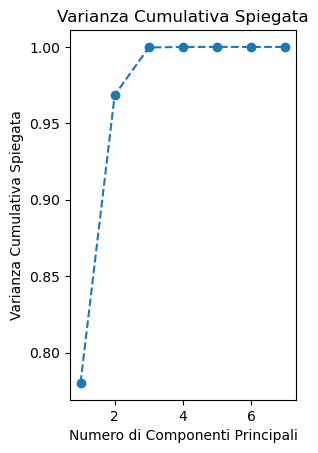

In [2]:
# 1
in_dir = "Exams/dec2021/"
pizza_data = np.loadtxt(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\PCAData\pizza.txt",
    comments="%",
)
x = pizza_data[0:300, 0:7]
data = x  # deve essere di tipo numpy, non gli va bene un panda dataframe
pca = PCA(n_components=7)
pca_model = pca.fit(data)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
# Plot della varianza cumulativa
plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(exp_var_ratio) + 1),
    np.cumsum(exp_var_ratio),
    marker="o",
    linestyle="--",
)
plt.xlabel("Numero di Componenti Principali")
plt.ylabel("Varianza Cumulativa Spiegata")
plt.title("Varianza Cumulativa Spiegata")

In [36]:
pca.mean_

array([40.90306667, 13.37356667, 20.22953333,  2.63323333,  0.6694    ,
       22.86476667,  3.271     ])

In [37]:
pc1 = pca_model.components_[0]
pc2 = pca_model.components_[1]

# new pizza is generated as 3 * principal component 1 + means of the features
feature_means = pca.mean_
new_pizza = 3 * pc1 + feature_means

print(new_pizza)

[40.07217639 12.57274229 19.39273266  2.46693105  0.63597518 25.49901976
  3.26919014]


In [51]:
from PIL import Image
import numpy as np
import os

# Load the images
in_dir = r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\ImagePCA"
image_files = [f for f in os.listdir(in_dir) if f.endswith(".png")]

images = []
for img_file in image_files:
    img_path = os.path.join(in_dir, img_file)
    img = Image.open(img_path).convert("L")  # Convert images to grayscale
    images.append(img)

# Convert the list of images to a NumPy array
images = np.array([np.array(img) for img in images])

# Compute the average image
average_image = np.mean(images, axis=0).astype(np.uint8)

# Apply thresholding
threshold_value = 150
thresholded_image = np.where(average_image > threshold_value, 255, 0).astype(np.uint8)

# Display or save the resulting image
result_image = Image.fromarray(thresholded_image)
result_image.show()
# result_image.save('resulting_image.png')  # Save the resulting image if needed

533 400


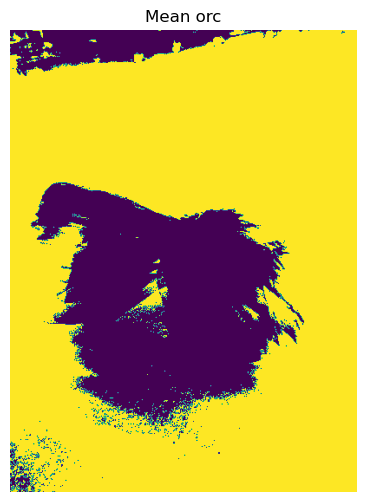

In [7]:
# 3
in_dir = "C:/Users/Dell/Desktop/Git Hub/02502-Image-Analysis-Cheatsheet/Exams/dec2021/ImagePCA"

files = glob.glob(f"{in_dir}/*.png")

height, width = io.imread(files[0]).shape
print(height, width)

data_matrix = np.zeros((len(files), height * width))
for i, f in enumerate(files):
    # print(f)
    # f_g = color.rgb2gray(f)
    data_matrix[i, :] = io.imread(f).flatten()
    # print(data_matrix[i, :])

# print(data_matrix)
average_img = np.mean(data_matrix, axis=0)

mask = average_img > 150
img_ = img_as_ubyte(mask)
average_cat_img = create_u_byte_image_from_vector(img_, height, width, 1)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.imshow(average_cat_img)
ax.set_title("Mean orc")
ax.set_axis_off()
plt.show()

In [9]:
# 4
orc_pca = PCA()
orc_pca.fit(data_matrix)

# Assuming 'data_matrix' contains your data and 'orc_pca' is already fitted
first_principal_component = orc_pca.components_[
    0
]  # Retrieve the first principal component

# Reshape the first principal component into an image
image_shape = (533, 400, 1)  # Assuming the original image shape
first_pc_image = first_principal_component.reshape(image_shape)
first_pc_image[10, 10]

array([-0.0040271])

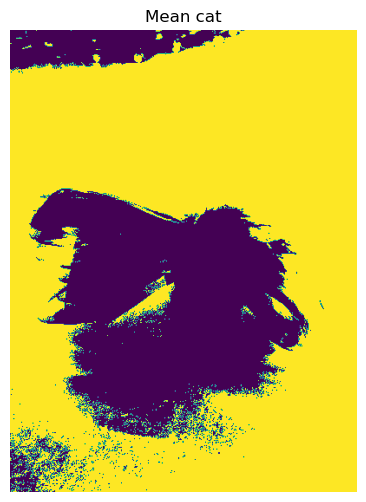

In [33]:
im1 = io.imread(
    "C:/Users/Dell/Desktop/Git Hub/02502-Image-Analysis-Cheatsheet/Exams/dec2021/ImagePCA/orchid001.png"
)
im2 = io.imread(
    r"C:/Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\ImagePCA\orchid002.png"
)
im3 = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\ImagePCA\orchid003.png"
)
im4 = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\ImagePCA\orchid004.png"
)
im5 = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\ImagePCA\orchid005.png"
)
im6 = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\ImagePCA\orchid006.png"
)


imgs = [im1, im2, im3, im4, im5, im6]
w = 400
h = 533
ch = 1
imgs_g = []
height, width = im1.shape

data_matrix = np.array(
    [
        im1.flatten(),
        im2.flatten(),
        im3.flatten(),
        im4.flatten(),
        im5.flatten(),
        im6.flatten(),
    ]
)
avg_im = np.mean(data_matrix, axis=0)

mask = avg_im > 150
avg_im = img_as_ubyte(mask)
# io.imshow(create_u_byte_image_from_vector(img_tresh, h, w, 1))
average_cat_img = create_u_byte_image_from_vector(avg_im, height, width, 1)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.imshow(average_cat_img)
ax.set_title("Mean cat")
ax.set_axis_off()
plt.show()

In [71]:
pca = decomposition.PCA()
pca.fit(data_matrix)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
pc1 = pca.components_[0]
# pc1_img = create_u_byte_image_from_vector(pc1, h, w, 1)
image_shape = (533, 400)  # Assuming the original image shape
first_pc_image = pc1.reshape(image_shape)
first_pc_image[9, 9]

-0.001995029872348653

In [75]:
im7 = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\ImagePCA\orchid007.png"
)
pca = PCA(n_components=1)
pca.fit(data_matrix)
pca.transform(im7.reshape(1, -1))

array([[-6310.70539076]])

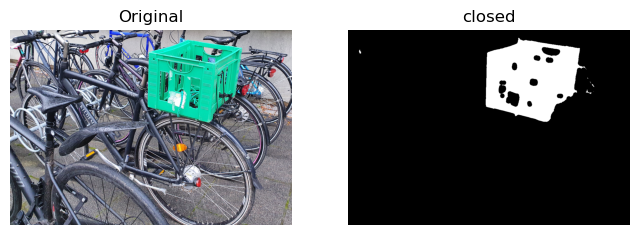

In [80]:
# 8 Bikes

bike_img = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\BikeImage\bikes.png"
)

# Extract individual color components
r_comp = bike_img[:, :, 0]
g_comp = bike_img[:, :, 1]
b_comp = bike_img[:, :, 2]

segm = (r_comp < 100) & (g_comp > 200) & (b_comp > 100)
img_segm = img_as_ubyte(segm)
# closing
footprint = disk(8)
closed = closing(img_segm, footprint)
show_comparison(bike_img, closed, "closed")

# show_comparison(bike_img, img_as_ubyte(segm))

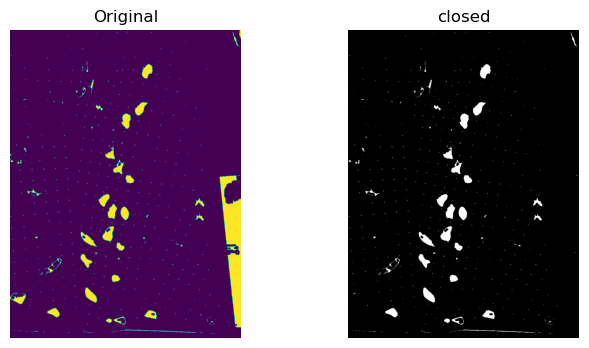

Number of labels: 566


In [13]:
bike_img = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\Climbing\ClimbingWall.png"
)

# Extract individual color components
r_comp = bike_img[:, :, 0]
g_comp = bike_img[:, :, 1]
b_comp = bike_img[:, :, 2]

segm = (r_comp < 60) & (g_comp < 200) & (b_comp < 100)
img_segm = img_as_ubyte(segm)
# closing
footprint = disk(3)
closed = closing(img_segm, footprint)
im_process = segmentation.clear_border(closed)
show_comparison(closed, im_process, "closed")
label_img = measure.label(im_process)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

In [17]:
min_area = 300
max_perimeter = 500

label_img = measure.label(closed)
region_props = measure.regionprops(label_img)

# Create a copy of the label_img
label_img_filter = label_img.copy()
for region in region_props:
    # Find the areas that do not fit our criteria
    crit1 = region.area < min_area
    crit2 = region.perimeter > max_perimeter
    if crit1 or crit2:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0

label_img = measure.label(label_img_filter)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 21


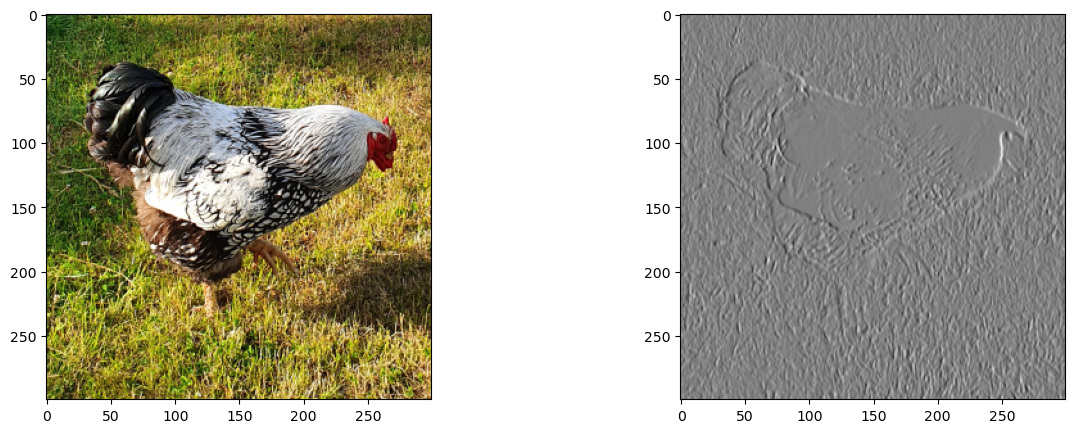

In [35]:
im_org = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2021\Bird\bird.png"
)

hsv_img = color.rgb2hsv(im_org)
s_img = hsv_img[:, :, 1]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].imshow(im_org)
im = ax[1].imshow(prewitt_v(s_img), cmap="gray", vmin=-1, vmax=1)
plt.show()

The photo called water_gray.png is filtered using a 3x3 median filter. 

A linear histogram stretching is then performed on the filtered image so
the new image has a maximum pixel value of 230 and a minimum pixel
value of 12. 

What is the pixel value at (row=20, column=20) in the new
image (a 1-based matrix coordinate system is used)?

In [73]:
water_img = io.imread(r"Exams/dec2021/Water/water_gray.png")


import numpy as np
from skimage import exposure


def histogram_stretching(image, min_val, max_val):
    # Normalizza l'immagine tra 0 e 1
    # normalized_image = exposure.rescale_intensity(
    #     image, in_range="image", out_range=(0, 1)
    # )

    # Esegui l'istogramma stretching usando i valori minimi e massimi desiderati
    stretched_image = exposure.rescale_intensity(image, in_range=(min_val, max_val))

    return stretched_image


new_img = histogram_stretching(water_img, 12, 230)
new_img[19, 19]

255

A scan has been done on a CT scanner and stored as a DICOM file. 

One of the slices of the scan is stored as a DICOM file called 1-131.dcm. 

Expert annotations of the liver (LiverROI.png), the spleen (SpleenROI.png), and
bone (BoneROI.png) are also provided. 

By using the DICOM image and the mask images, gray-values representing the liver, the spleen, and the
bone can be extracted.

The goal is to develop a minimum distance classifier based on the
annotated data. What will be the gray-value range of the spleen?

In [44]:
# dcm = dicom.read_file(r"Exams\dec2021\DICOM\1-131.dcm")
# liver_roi = io.imread(r"Exams\dec2021\DICOM\LiverROI.png")
# bone_roi = io.imread(r"Exams\dec2021\DICOM\BoneROI.png")
# spleen_roi = io.imread(r"Exams\dec2021\DICOM\SpleenROI.png")
# import dicom
# from skimage import io

# Carica il file DICOM e le maschere delle regioni di interesse
dcm = dicom.read_file("Exams/dec2021/DICOM/1-131.dcm")
im = dcm.pixel_array
liver_roi = io.imread("Exams/dec2021/DICOM/LiverROI.png")
bone_roi = io.imread("Exams/dec2021/DICOM/BoneROI.png")
spleen_roi = io.imread("Exams/dec2021/DICOM/SpleenROI.png")

liver_mask = liver_roi > 0
bone_mask = bone_roi > 0
spleen_mask = spleen_roi > 0

liver_val = im[liver_mask]
bone_val = im[bone_mask]
spleen_val = im[spleen_mask]

liver_mu = np.mean(liver_val)
bone_mu = np.mean(bone_val)
spleen_mu = np.mean(spleen_val)

print(liver_mu, bone_mu, spleen_mu)

print(f"{(liver_mu+spleen_mu)/2}, {(bone_mu+spleen_mu)/2}")

73.28221208665906 838.4418604651163 124.72452830188679
99.00337019427292, 481.58319438350156


A scan has been done on a CT scanner and stored as a DICOM file. One of
the slices of the scan is stored as a DICOM file called 1-131.dcm. 
A low threshold, T1=85, and a high threshold, T2=400, are defined. 

The scan is
segmented by setting pixels with values that are higher than T1 and
lower than T2 to foreground (1) and the rest of the pixels to background
(0).

A morphological closing with a disk-shaped structuring element with
radius=5 is performed on the binary image, followed by a morphological
opening with a disk-shaped structuring element with radius=3. 

When
doing a dilation, pixels beyond the image border are assigned a value of
0 and when doing an erosion the pixels beyond the image border are
assigned a value of 1 (the default Matlab behavior).


A BLOB analysis is then performed using 8-connectivity and only BLOBs
with an area between 1000 and 4000 pixels are kept. How many BLOBs
are there in the final image?

In [49]:
dcm = dicom.read_file("Exams/dec2021/DICOM/1-131.dcm")
im = dcm.pixel_array

t1 = 85
t2 = 400

img_tresh = (im > t1) & (im < t2)

footprint = disk(5)
closed = closing(img_tresh, footprint)

footprint = disk(3)
opened = opening(closed, footprint)

min_area = 1000
max_area = 4000

label_img = measure.label(opened)
region_props = measure.regionprops(label_img)

# Create a copy of the label_img
label_img_filter = label_img.copy()
for region in region_props:
    # Find the areas that do not fit our criteria
    crit1 = region.area < min_area
    crit2 = region.area > max_area
    if crit1 or crit2:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0

label_img = measure.label(label_img_filter)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 3


Two similar images have been acquired (donald_1.png and donald_2.png). 

Six corresponding landmarks have been placed on the two images and are stored in the files donaldfixedPoints.mat and
donaldmovingPoints.mat. 

The center of mass (the average landmark
position) has been computed for both sets of points. 

What is the
Euclidean distance between these two center of masses?

In [2]:
don1 = io.imread(r"Exams\dec2021\Donald\donald_1.png")
don2 = io.imread(r"Exams\dec2021\Donald\donald_2.png")

import scipy.io

# Sostituisci 'tuo_file.mat' con il percorso del tuo file .mat
fixd = r"Exams\dec2021\Donald\donaldfixedPoints.mat"
mving = r"Exams\dec2021\Donald\donaldmovingPoints.mat"

# Carica il file .mat
mat_contents1 = scipy.io.loadmat(fixd)
mat_contents2 = scipy.io.loadmat(mving)

av1 = np.mean(mat_contents1["fixedPoints"], axis=0)
av2 = np.mean(mat_contents2["movingPoints"], axis=0)

dist = np.linalg.norm(av1 - av2)
dist

6.4113001682773065

A similarity transform (translation, rotation, and scaling) has been
performed that aligns the moving points to the fixed points. 

The computed transform is applied to the donald_2.png photo. 

What is the RGB value at position (row=300, column=300, in a 1-based matrix
coordinate system) in the transformed image?

Landmark alignment error F (sum of squared differences): 139643.9242770443


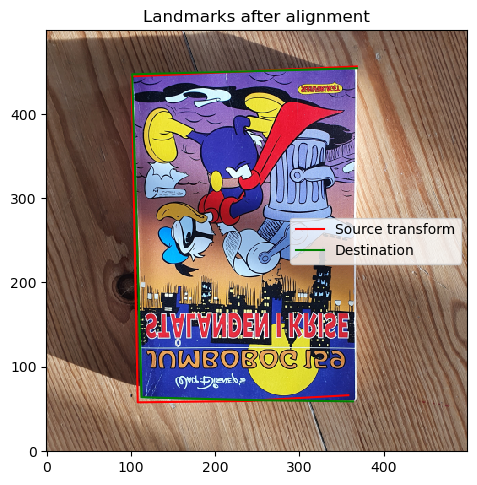

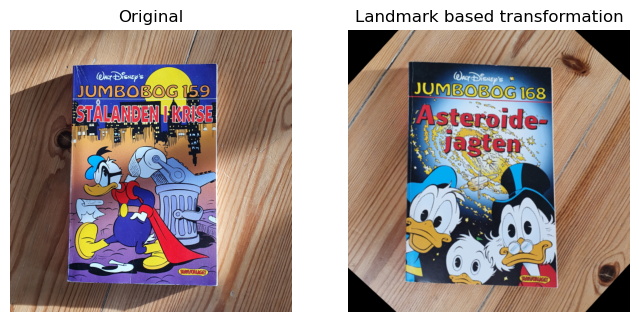

array([17, 21, 32], dtype=uint8)

In [3]:
don1 = io.imread(r"Exams\dec2021\Donald\donald_1.png")
don2 = io.imread(r"Exams\dec2021\Donald\donald_2.png")

# Sostituisci 'tuo_file.mat' con il percorso del tuo file .mat
fixd = r"Exams\dec2021\Donald\donaldfixedPoints.mat"
mving = r"Exams\dec2021\Donald\donaldmovingPoints.mat"

# Carica il file .mat
dst = scipy.io.loadmat(fixd)
src = scipy.io.loadmat(mving)

dst_points = dst["fixedPoints"]
src_points = src["movingPoints"]

e_x = src_points[:, 0] - dst_points[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_points[:, 1] - dst_points[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F (sum of squared differences): {f}")


tform = SimilarityTransform()
tform.estimate(src_points, dst_points)
tform.scale_params = True
src_transform = matrix_transform(src_points, tform.params)

fig, ax = plt.subplots()
io.imshow(don1)
ax.plot(
    src_transform[:, 0],
    src_transform[:, 1],
    "-r",
    markersize=12,
    label="Source transform",
)
ax.plot(dst_points[:, 0], dst_points[:, 1], "-g", markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks after alignment")
plt.show()

warped = warp(don2, tform.inverse)
show_comparison(don1, warped, "Landmark based transformation")
warped = img_as_ubyte(warped)
warped[299, 299]

Landmark alignment error F (sum of squared differences): 139643.9242770443


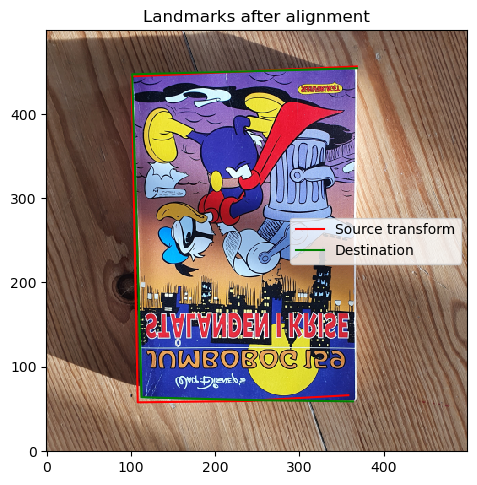

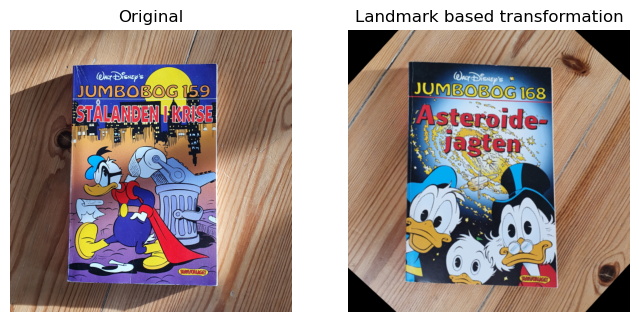

array([17, 21, 32], dtype=uint8)

In [6]:
wap = similarity_transformation(don1, don2, src_points, dst_points)
wap[299, 299]

A customer has asked you to design a prototype system for the
inspection of children's plastic balls. You are setting up a camera with a
CCD ship that measures 5.4 x 4.2 mm and that has a focal length of f=15
mm. It can be assumed that b=f. The photos from the camera have
dimensions 6480 x 5040 pixels. The camera is placed 1.5 meter from the
ball, where the photos of the balls passing by are sharp. An example ball
has been tested and the diameter of the ball is 2400 pixels on the photo.
What is the physical diameter of the ball?

In [8]:
measures = 5.4
f = 15
b = f  # b
dim_camera = 6480
g = 1.5  # g = dist
diam = 2400
# B = dim_camera:measures=diam
B = measures * diam / dim_camera
G = g * B / b
G

0.2

A photo containing bikes has been taken  (bikes.png). An RGB treshold is
applied to this photo, so pixels within the limits R < 100, G > 200 and B >
100 are set to foreground (1) and the rest of the pixels are set to
background (0). 
The resulting binary image is morphologically closed using a disk-
shaped structuring element with radius = 8.
When doing the closing, the pixels beyond the image border are
assigned a value of 0 for the dilation and 1 for the erosion (the default
Matlab behavior).
A ground truth segmentation is provided in the file boxROI.png.
What is the DICE score between your segmentation and the ground truth
segmentation?

In [20]:
from scipy.spatial import distance

bikes_img = io.imread(r"Exams\dec2021\BikeImage\bikes.png")
boxROI = io.imread(r"Exams\dec2021\BikeImage\boxROI.png")


# Extract individual color components
r_comp = bikes_img[:, :, 0]
g_comp = bikes_img[:, :, 1]
b_comp = bikes_img[:, :, 2]

segm = (r_comp < 100) & (g_comp > 200) & (b_comp > 100)
img_segm1 = img_as_ubyte(segm)


# closing
footprint = disk(8)
closed = closing(img_segm1, footprint)
# show_comparison(closed, boxROI)

gt_bin = resize(boxROI, closed.shape)
dice_score = 1 - distance.dice(closed.ravel(), gt_bin.ravel())
print(f"DICE score {dice_score}")

DICE score 1.9690680049274234


You have been asked to design a vision system for a self-driving robot.

The first system should be able to classify grass, road, and sky and is
using a gray level camera (where a pixel value of 0 is black and 255 is
white).

For training, you have received the following gray values:
 
Grass: 68, 65, 67

Road: 70, 80, 75

Sky: 77, 92, 89
 
For a minimum distance classifier, your gray level class ranges would be?

Gray Level Class Ranges:
Class 1: [66 - 75)
Class 2: [76 - 86)


In [42]:
Grass = [68, 65, 67]
Road = [70, 80, 75]
Sky = [77, 92, 89]
lista = [Grass, Road, Sky]


def minimum_distance_classifier(lista):
    means = []
    for i, el in enumerate(lista):
        mu = round(np.mean(el), 3)
        # round((means[idx1] + means[idx2]) / 2, 3)
        means.append(mu)
        print(f"{el} - mean = {means[i]}")

    grey_values = {}
    sorted_indices = sorted(range(len(means)), key=lambda x: means[x])

    # Calcola i punti medi tra due elementi consecutivi
    for i in range(len(sorted_indices) - 1):
        idx1 = sorted_indices[i]
        idx2 = sorted_indices[i + 1]
        midpoint = round((means[idx1] + means[idx2]) / 2, 3)
        grey_values[f"({means[idx1]}, {means[idx2]})"] = midpoint

    print(f"\n{grey_values}")
    return grey_values


ciao = minimum_distance_classifier(lista)

[68, 65, 67] - mean = 66.667
[70, 80, 75] - mean = 75.0
[77, 92, 89] - mean = 86.0

{'(66.667, 75.0)': 70.834, '(75.0, 86.0)': 80.5}


You have been asked to design a vision system for a self-driving robot.

The first system should be able to classify grass, road, and sky and is
using a gray level camera (where a pixel value of 0 is black and 255 is
white). For training, you have received the following gray values:
 
Grass: 68, 65, 67
Road: 70, 80, 75
Sky: 77, 92, 89
 
For a parametric classifier, your gray level class ranges would be?

In [54]:
import numpy as np
from scipy.stats import norm


def parametric_distance_classifier(lista):
    means, stds = [], []

    for el in lista:
        mu = round(np.mean(el), 3)
        std = round(np.std(el), 3)
        means.append(mu)
        stds.append(std)
        print(f"{el} - mean = {mu}     std = {std}")

    thresholds = []

    # Calcola la soglia di decisione tra classi adiacenti
    for i in range(len(means) - 1):
        mu_low = means[i]
        std_low = stds[i]
        mu_high = means[i + 1]
        std_high = stds[i + 1]
        thres_low_high = None

        # Calcola la soglia tra le due distribuzioni normali
        for test_value in np.linspace(mu_low, mu_high, 1000):
            if norm.pdf(test_value, mu_high, std_high) > norm.pdf(
                test_value, mu_low, std_low
            ):
                thres_low_high = round(test_value, 3)
                break

        # Memorizza la soglia tra classi adiacenti
        if thres_low_high is not None:
            thresholds.append((f"class_{i + 1} and class_{i + 2}", thres_low_high))

    result = sorted(thresholds, key=lambda x: x[1])
    print("\nThresholds between adjacent classes:")
    for threshold in result:
        print(f"{threshold[0]}: {threshold[1]}")
    return result


# Esempio di utilizzo con un numero variabile di classi
Grass = [68, 65, 67]
Road = [70, 80, 75]
Sky = [77, 92, 89]
lista = [Grass, Road, Sky]

result = parametric_distance_classifier(lista)

[68, 65, 67] - mean = 66.667     std = 1.247
[70, 80, 75] - mean = 75.0     std = 4.082
[77, 92, 89] - mean = 86.0     std = 6.481

Thresholds between adjacent classes:
class_1 and class_2: 69.269
class_2 and class_3: 80.318


# FALL 2022


## 1


1. Reads the DICOM image
2. Uses the annotated regions to extract pixel values in the liver, kidney and aorta
   regions
3. Determines two threshold using minimum distance classification. Threshold
   number (t1) separates the liver and the kidney. The second threshold (t2)
   separates the kidney and the aorta.
4. Segments the DICOM image by setting all pixel that have a value >t1 and <t2 to
   foreground and the rest to background.
5. Computes the DICE score between the resulting segmented image and the
   KidneyROI.png image.


In [2]:
in_dir = "Exams/dec2022/data/"
im_name = "dicom/1-162.dcm"
ct = dicom.read_file(in_dir + im_name)
img = ct.pixel_array

In [4]:
liver_roi = io.imread(in_dir + "LiverROI.png")
liver_mask = liver_roi > 0
liver_values = img[liver_mask]
kidney_roi = io.imread(in_dir + "KidneyROI.png")
kidney_mask = kidney_roi > 0
kidney_values = img[kidney_mask]
aorta_roi = io.imread(in_dir + "AortaROI.png")
aorta_mask = aorta_roi > 0
aorta_values = img[aorta_mask]
# print(f"liver: {liver_values}\nkidney: {kidney_values}\naorta: {aorta_values}")

In [5]:
mu_liver = np.mean(liver_values)
mu_kidney = np.mean(kidney_values)
mu_aorta = np.mean(aorta_values)

t_liver_kidney = (mu_liver + mu_kidney) / 2
t_kidney_aorta = (mu_kidney + mu_aorta) / 2
print(t_liver_kidney, t_kidney_aorta)

135.53619417264818 196.7035801627044


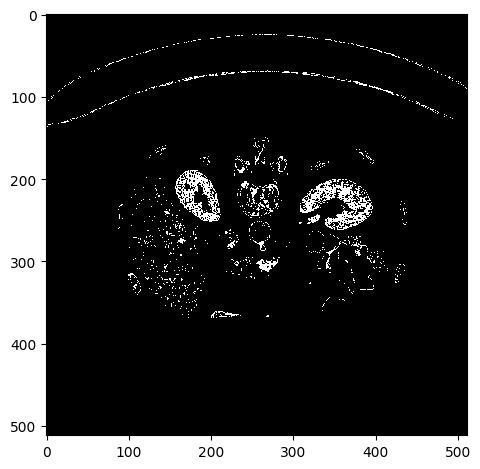

In [6]:
kidney_img = (img > t_liver_kidney) & (img < t_kidney_aorta)
io.imshow(kidney_img)
io.show()

In [9]:
dice_score = 1 - distance.dice(kidney_img.ravel(), kidney_roi.ravel())
print(f"DICE score {dice_score:.3f}")

DICE score 0.241


## 2


The five data points (x, y):

(7,13), (9,10), (6,10), (6,8), (3,6)

result in the corresponding five Hough space sinograms (curves in Hough space) shown below.

Two Hough space sinograms are crossing at (rho = 0.29, theta = 151 ).

What are the corresponding data points for the two crossing curves in Hough space? (approximately)


In [4]:
convert_xy_to_hough(0.29, 151, [7, 9, 6, 6, 3])

Approximate data points in the xy-plane:
(7, 13.23)
(9, 16.83)
(6, 11.42)
(6, 11.42)
(3, 6.01)


## 3


We are searching for the shortest path going from the top to the bottom
of the image below.

You are using dynamic programming for the task
and as part of that you are computing an accumulator image.

What is the
minimal value of the last row of the computed accumulator image?


In [5]:
print(f"minimal value = {19 + 23 + 17 + 18 + 44}")

minimal value = 121


## 4


In [3]:
integral_value = [33, 12, 110, 200, 53, 81, 220, 120, 107]

integral_image(integral_value)

INTEGRAL IMAGE = 936


## 5


1. Converts the input image from RGB to gray scale and transforms it into a floating
   point image.
2. Does a linear gray scale transformation so the transformed image has a minimum
   pixel value of 0.1 and a maximum pixel value of 0.6
3. Computes a pixel value threshold using Otsu's method
4. Applies the found threshold, so all pixels with values above the threshold
   becomes foreground (white) and the rest background (black)


0.3724609375


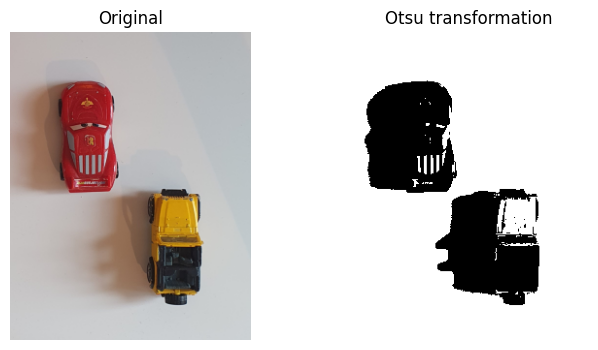

In [5]:
def func5():
    img_path = "Exams\dec2022\data\PixelWiseOps\pixelwise.png"

    im_1 = io.imread(img_path)

    grey_img = color.rgb2gray(im_1)

    transf_img = linear_gray_scale_transformation(grey_img, 0.1, 0.6)

    tresh = threshold_otsu(transf_img)

    print(tresh)
    img_otsu = transf_img > tresh

    show_comparison(im_1, img_otsu, "Otsu transformation")


func5()

## 6


You would like to make a cool black and white illustration of a rocket.

To do that you filter the image (rocket.png) with a Prewitt filter.

Secondly, you threshold the filtered image, so all pixels with a value above 0.06
become white and the rest black.

How many white pixels are there in the
resulting image?


In [ ]:
rocket = io.imread(
    r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\dec2022\data\Filtering\rocket.png"
)


img_prewitt = prewitt(img_as_ubyte(rocket))


# show_comparison(rocket, img_prewitt, "title")


bin_edges = img_prewitt > 0.06
io.imshow(bin_edges)
io.show()


num_pixels = bin_edges.sum()


print(f"Number of edge pixels {num_pixels}")

In [ ]:
io.imshow(rocket)
io.show()
print("data type = ", rocket.dtype)

# complete prewitt
img_prewitt = prewitt(rocket)
print("data type = ", img_prewitt.dtype)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(rocket, cmap="gray")
ax[1].imshow(img_prewitt, cmap="gray", vmin=0, vmax=1)
plt.show()

filtered = img_prewitt > 0.06
print(filtered.dtype)

io.imshow(filtered)
# Utilizza numpy.unique per ottenere valori unici e i loro conteggi
valori_unici, conteggi = np.unique(filtered, return_counts=True)

# Stampa valori unici e i loro conteggi
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Conteggio: {conteggio}")

## 7


In [24]:
import numpy as np

# Dati forniti
x = np.array([23, 5])
mu_1 = np.array([24, 3])
mu_2 = np.array([30, 7])
sigma = np.array([[2, 0], [0, 2]])

# Calcolo del vettore peso w
sigma_inv = np.linalg.inv(sigma)
w = np.dot(sigma_inv, (mu_2 - mu_1))

# Calcolo della soglia cw
cw = 1 - 0.5 * np.dot(np.dot(((mu_1 + mu_2).T), sigma_inv), (mu_2 - mu_1))

# Calcolo di y_c in 2
y_c_in_2 = np.dot(x.T, w) + cw

print(f"y = {y_c_in_2} e cw = {cw}")

# Determinazione della classe di appartenenza
if y_c_in_2 > 0:
    print(f"Il punto {x} appartiene alla Classe 2")
else:
    print(f"Il punto {x} appartiene alla Classe 1")

y = -11.0 e cw = -90.0
Il punto [23  5] appartiene alla Classe 1


In [19]:
# Dati forniti
x = np.array([23, 5])
mu_1 = np.array([24, 3])
mu_2 = np.array([30, 7])
sigma = np.array([[2, 0], [0, 2]])

# Calcolo del vettore peso w
sigma_inv = np.linalg.inv(sigma)
w = np.dot(sigma_inv, (mu_2 - mu_1))

# Calcolo della soglia cw
cw = 0.5 * (
    np.dot(np.dot(mu_1.T, sigma_inv), mu_1) - np.dot(np.dot(mu_2.T, sigma_inv), mu_2)
)

cw = 1 - 0.5 * np.dot(np.dot(((mu_1 + mu_2).T), sigma_inv), (mu_2 - mu_1))

# Calcolo di y_c in 2
y_c_in_2 = np.dot(x.T, w) + cw
print(f"y = {y_c_in_2} e cw = {cw}")

# Determinazione della classe di appartenenza
if y_c_in_2 > cw:
    print(f"Il punto {x} appartiene alla Classe 2")
else:
    print(f"Il punto {x} appartiene alla Classe 1")

y = -11.0 e cw = -90.0
Il punto [23  5] appartiene alla Classe 2


## 8


You have been asked by a farmer to develop a machine vision system that can detect if
a cow or a sheep is passing by a camera.

The camera just measure the average intensity of the image of the animal. To train your system, the farmer has given you these measured training data measured on 10 cows and 12 sheep:

Cows = [26, 46, 33, 23, 35, 28, 21, 30, 38, 43]

Sheep = [67, 27, 40, 60, 39, 45, 27, 67, 43, 50, 37, 100]

First, you try to compute the intensity threshold dividing cows and sheep using a
minimum distance classifier.

Secondly, you fit Gaussians to the two sets of the data to do a parametric classification.


In [106]:
cows = [26, 46, 33, 23, 35, 28, 21, 30, 38, 43]
sheeps = [67, 27, 40, 60, 39, 45, 27, 67, 43, 50, 37, 100]

mu_cow = np.mean(cows)
mu_sheep = np.mean(sheeps)

min_dist = (mu_cow + mu_sheep) / 2

from scipy.stats import norm

# Fit Gaussian distributions to cows and sheep data
cows_mean, cows_std = norm.fit(cows)
sheep_mean, sheep_std = norm.fit(sheeps)

# Calculate PDF values at value=38 for cows and sheep distributions
value = 38
pdf_cows = norm.pdf(value, cows_mean, cows_std)
pdf_sheep = norm.pdf(value, sheep_mean, sheep_std)

print(f"PDF value for cows at value=38: {pdf_cows}")
print(f"PDF value for sheep at value=38: {pdf_sheep}")

PDF value for cows at value=38: 0.03898570495862376
PDF value for sheep at value=38: 0.016687527843330045


# Spring 2021

The irisdata.txt file contains measurements from 150 iris flowers. 

The measurements are the sepal length, sepal width, petal length and petal width. 

So you have M=4 features, N=150 observations. A principal component analysis (PCA) should be done
on these data. 

How many percent of the total variation do the two first principal
components explain?

Number of features: 4 and number of observations: 150


Text(0.5, 1.0, 'Varianza Cumulativa Spiegata')

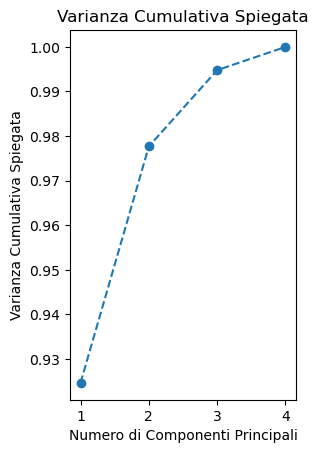

In [3]:
# load txt dataset
txt_name = r"C:\Users\Dell\Desktop\Git Hub\02502-Image-Analysis-Cheatsheet\Exams\may2021\irisdata.txt"
iris_data = np.loadtxt(txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:150, 0:4]
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

# compute variance for each feature
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_l = pet_w.var(ddof=1)


# display matrix of scatterplots of pair of features.
plt.figure()  # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(
    x, columns=["Sepal length", "Sepal width", "Petal length", "Petal width"]
)
# sns.pairplot(d)
# plt.show()

# perform PCA
data = x  # deve essere di tipo numpy, non gli va bene un panda dataframe
pca = decomposition.PCA()
pca_model = pca.fit(data)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_  # vector of the principal components

pc1 = pca_model.components_[0]
pc2 = pca_model.components_[1]

# Plot della varianza cumulativa
plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(exp_var_ratio) + 1),
    np.cumsum(exp_var_ratio),
    marker="o",
    linestyle="--",
)
plt.xlabel("Numero di Componenti Principali")
plt.ylabel("Varianza Cumulativa Spiegata")
plt.title("Varianza Cumulativa Spiegata")

After the PCA, the flower data (sepal lengths and widths, petal lengths and widths)
are projected into PCA space. What are the projected values of the first flower?

In [4]:
data_transform = pca.transform(
    data
)  # proietta i dati (in questo caso non normalizzati, lungo le componenti principali)
data_transform[0]

array([-2.68412563e+00,  3.19397247e-01, -2.79148276e-02, -2.26243707e-03])

The photo called sky_gray.png is loaded and a linear histogram stretching is
performed so the new image has a maximum pixel value of 200 and a minimum pixel
value of 10. 

What is the average pixel value of the new image?

In [21]:
def histogram_stretch(img_in, min, max):
    """
    Stretches the histogram of an image
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = min
    max_desired = max

    # Do something here
    img_out = (
        (img_float - min_val) * (max_desired - min_desired) / (max_val - min_val)
    ) + min_desired
    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_out

In [22]:
sky_gray = io.imread(r"Exams\may2021\sky_gray.png")

np.mean(histogram_stretch(sky_gray, 10, 200))

86.99181821165968

The photo called sky.png is loaded and an RGB threshold is performed with the limits
R < 100, G > 85, G < 200, and B > 150.

Pixels with values within these limits are set to
foreground and the rest of the pixels are set to background.

The resulting 2D binary image is morphologically eroded using a disk-shaped
structuring element with radius=5.

When doing an erosion the pixels beyond the image border are assigned a value of 1
(the default Matlab behavior).

How many foreground pixels are there in the final image?

In [26]:
sky = io.imread(r"Exams\may2021\sky.png")


# Extract individual color components
r_comp = sky[:, :, 0]
g_comp = sky[:, :, 1]
b_comp = sky[:, :, 2]

segm = (r_comp < 100) & (g_comp < 200) & (b_comp > 150)
img_segm = img_as_ubyte(segm)
# closing
footprint = disk(5)
eroded = erosion(img_segm, footprint)


# Conta le istanze di valori unici
valori_unici, conteggi = np.unique(np.array(eroded), return_counts=True)

# Stampa i risultati
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Numero di istanze: {conteggio}")

Valore: 0, Numero di istanze: 28195
Valore: 255, Numero di istanze: 20957


The photo called flower.png is loaded and it is converted from the RGB color space to
the HSV color space.

 Secondly, a threshold is performed on the HSV values with the
limits H < 0.25, S > 0.8 and V > 0.8. 

Pixels with values within these limits are set to
foreground and the rest of the pixels are set to background.

Finally, a morphological opening is performed on the binary image using a diskshaped structuring element with radius=5. 

When doing a dilation, pixels beyond the image border are assigned a value of 0 and when doing an erosion the pixels beyond
the image border are assigned a value of 1 (the default Matlab behavior).

What is the number of foreground pixels in the resulting image?


In [27]:
flower = io.imread(r"Exams\may2021\flower.png")

hsv_img = color.rgb2hsv(flower)
h_img = hsv_img[:, :, 0]
s_img = hsv_img[:, :, 1]
v_img = hsv_img[:, :, 2]

img_tresh = (h_img < 0.25) & (s_img > 0.8) & (v_img > 0.8)

footprint = disk(5)
opened = opening(img_tresh, footprint)

# Conta le istanze di valori unici
valori_unici, conteggi = np.unique(np.array(opened), return_counts=True)

# Stampa i risultati
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Numero di istanze: {conteggio}")

Valore: False, Numero di istanze: 475052
Valore: True, Numero di istanze: 4948


Five photos have been taken. They are named car1.jpg - car5.jpg and they have the
dimensions (W=800, H=600). 

A principal component analysis (PCA) is performed on
the grey values of the five images. 

You can use the two helper functions
pc_evectors.m and sortem.m to compute the PCA. 

How much of the total variation in
the images is explained by the first principal component?

Text(0.5, 1.0, 'Varianza Cumulativa Spiegata')

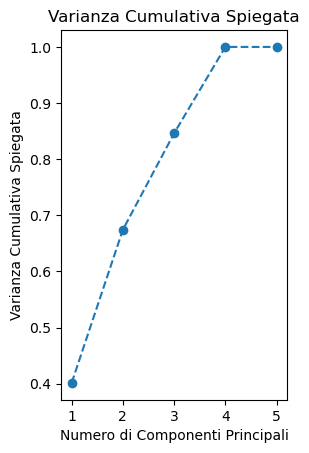

In [30]:
car1 = io.imread(r"Exams\may2021\car1.jpg")
car2 = io.imread(r"Exams\may2021\car2.jpg")
car3 = io.imread(r"Exams\may2021\car3.jpg")
car4 = io.imread(r"Exams\may2021\car4.jpg")
car5 = io.imread(r"Exams\may2021\car5.jpg")

imgs = [car1, car2, car3, car4, car5]
w = 800
h = 600
ch = 1
imgs_g = []
height, width = car1.shape

data_matrix = np.array(
    [
        car1.flatten(),
        car2.flatten(),
        car3.flatten(),
        car4.flatten(),
        car5.flatten(),
    ]
)


d = pd.DataFrame(data_matrix)

# perform PCA
pca = decomposition.PCA()
pca_model = pca.fit(d)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_  # vector of the principal components

pc1 = pca_model.components_[0]
pc2 = pca_model.components_[1]

# Plot della varianza cumulativa
plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(exp_var_ratio) + 1),
    np.cumsum(exp_var_ratio),
    marker="o",
    linestyle="--",
)
plt.xlabel("Numero di Componenti Principali")
plt.ylabel("Varianza Cumulativa Spiegata")
plt.title("Varianza Cumulativa Spiegata")

The photo called sky_gray.png is transformed using a gamma mapping
with gamma=1.21. 

The output image is filtered using a 5x5 median filter.


What is the resulting pixel value in the pixel at row=40, column=50 (when
using a 1-based matrix-based coordinate system)?

In [31]:
def gamma_map(img_in, gamma):
    """
    Stretches the histogram of an image
    :param img_in: Input image
    :param gamma: Exponent
    :return: Gamma-mapped image
    """
    img_float = img_as_float(img_in)
    img_out = np.power(img_float, gamma)
    return img_as_ubyte(img_out)


def apply_median_filter(img, size):
    footprint = np.ones([size, size])
    med_img = median(img, footprint)
    return med_img


sky_gamma = gamma_map(sky_gray, 1.21)
sky_median = apply_median_filter(sky_gamma, 5)
sky_median[40, 50]

68

The photo called flowerwall.png is filtered using an average filter with a filter size of
15. 

The filtering is performed with border replication.

 What is the resulting pixel value in the pixel at row=5 and column=50 (when using a 1-based matrix-based coordinate
system)?


In [32]:
flowerwall = io.imread(r"Exams\may2021\flowerwall.png")


def apply_mean_filter(img, size):
    weights = np.ones([size, size])
    weights = weights / np.sum(weights)

    out_img = correlate(img, weights, mode="reflect")
    return out_img


flower_mean = apply_mean_filter(flowerwall, 15)
flower_mean[5, 50]

208

A photo has been taken of a set of floorboards (floorboards.png) and the goal is to
measure the amounts of knots in the wood. 

First, a threshold of 100 is used, so pixels below the threshold are set to foreground and the rest is set to background. 

To remove noise a morphological closing is performed with a disk-shaped structuring
element with radius=10 followed by a morphological opening with a disk-shaped
structuring element with radius=3. 

When doing a dilation, pixels beyond the image
border are assigned a value of 0 and when doing an erosion the pixels beyond the
image border are assigned a value of 1 (the default Matlab behavior).

Finally, all BLOBs that are connected to the image border are removed. How many
foreground pixels are remaining in the image?


c:\Users\Dell\anaconda3\envs\course02502\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


Valore: 0, Numero di istanze: 873600


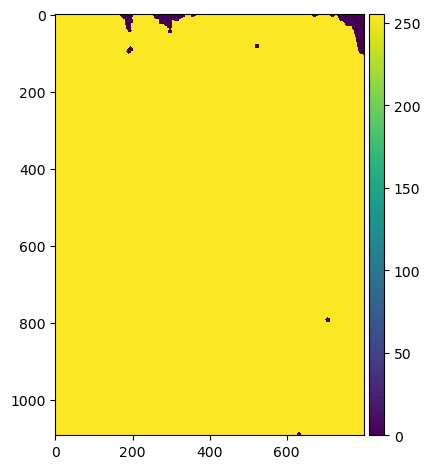

In [52]:
fb = io.imread(r"Exams\may2021\floorboards.png")

# io.imshow(fb)
fb_tresh = fb > 100
fb_tresh = img_as_ubyte(fb_tresh)
# io.imshow(fb_tresh)

# closing
footprint = disk(5)
closed = closing(fb_tresh, footprint)

# opening
footprint = disk(3)
opened = opening(closed, footprint)
# plot_comparison(im_org, opened, "opened")

im_process = segmentation.clear_border(opened)

io.imshow(opened)
# Conta le istanze di valori unici
valori_unici, conteggi = np.unique(np.array(im_process), return_counts=True)

# Stampa i risultati
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Numero di istanze: {conteggio}")

The area of the found BLOBs are computed and only the BLOBs with an
area larger than 100 pixels are kept. 

How many BLOBs are found in the
final image?

In [54]:
max_area = 100


label_img = measure.label(opened)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
    # Find the areas that do not fit our criteria
    if region.area < max_area:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0

Number of labels: 1


The binary image books_bw.png contains letters.

 A BLOB analysis is performed using 8-connectivity.
 
  For each BLOB, the area and the perimeter is computed.

   The BLOBs with area > 100 and perimeter > 500
are kept.

 Which letters are visible in the final image?

Number of labels: 78


c:\Users\Dell\anaconda3\envs\course02502\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


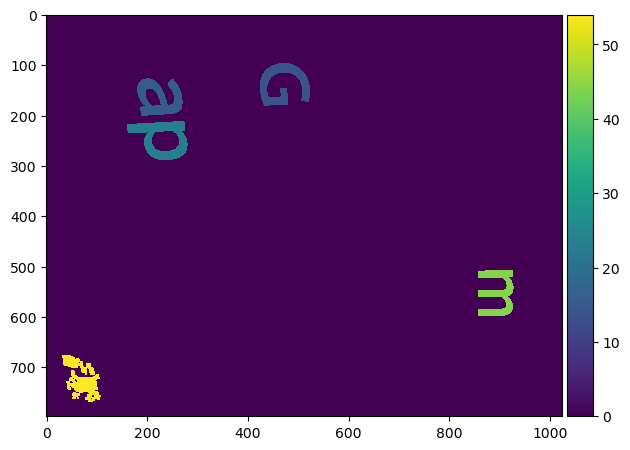

In [63]:
books = io.imread(r"Exams\may2021\books_bw.png")
# io.imshow(books)
max_perim = 500
max_area = 100

label_img = measure.label(books)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

region_props = measure.regionprops(label_img)

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
    # Find the areas that do not fit our criteria
    if region.area < max_area or region.perimeter < max_perim:
        # set the pixels in the invalid areas to background
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
# print(f"Number of labels: {len(i_area)}")

io.imshow(label_img_filter)

Seven corresponding landmarks have been placed on two images
(cat1.png and cat2.png). 

The landmarks are stored in the files catfixedPoints.mat and catmovingPoints.mat. 

What is the sum of squared dierences between the fixed and the moving landmarks?

In [77]:
cat1 = io.imread(r"Exams\may2021\cat1.png")
cat2 = io.imread(r"Exams\may2021\cat2.png")

import scipy.io

# Sostituisci 'tuo_file.mat' con il percorso del tuo file .mat
fixd = r"Exams\may2021\catfixedPoints.mat"
mving = r"Exams\may2021\catmovingPoints.mat"

# Carica il file .mat
mat_contents1 = scipy.io.loadmat(fixd)
mat_contents2 = scipy.io.loadmat(mving)


# Extract the landmark points from the loaded data
fixed_points = mat_contents1["fixedpoints"]
moving_points = mat_contents2["movingpoints"]

# Calculate the sum of squared differences between fixed and moving landmarks
squared_diff_sum = ((fixed_points - moving_points) ** 2).sum()

print(
    "Sum of squared differences between fixed and moving landmarks:", squared_diff_sum
)

Sum of squared differences between fixed and moving landmarks: 46552.968750000015


Seven corresponding landmarks have been placed on two images (cat1.png and
cat2.png). 

The landmarks are stored in the files catfixedPoints.mat and
catmovingPoints.mat. 

A similarity transform (translation, rotation, and scaling) has been performed that aligns the moving points to the fixed points. 

The computed
transform is applied to the cat2.png photo. How does the resulting image look like?

Landmark alignment error F (sum of squared differences): 46552.96875000002


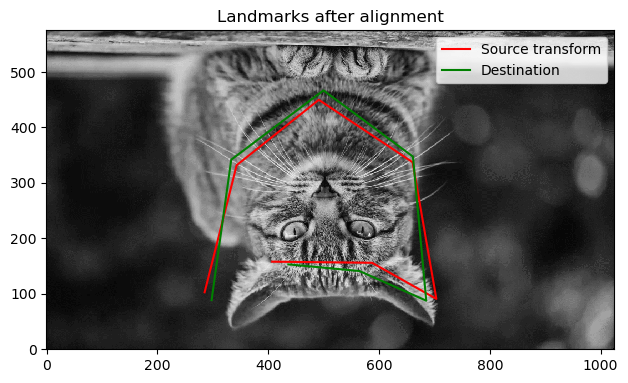

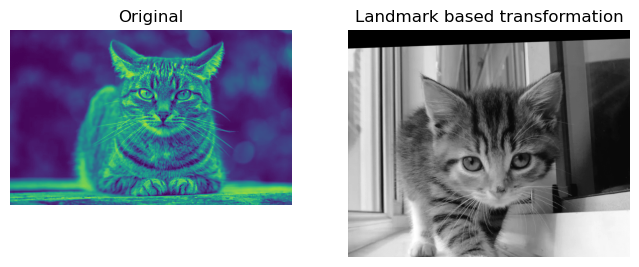

In [83]:
war = similarity_transformation(cat1, cat2, moving_points, fixed_points)

# io.imshow(war)

An abdominal scan has been acquired on a CT scanner. 

One of the slices of the scan is
stored as a DICOM file called 1-179.dcm. 

An expert has marked a part of the liver as
a binary mask (region of interest). 

The binary mask is stored as the file LiverROI.png.

By using the DICOM image and the mask image, the image values in the DICOM image
inside the mask (the liver) can be extracted.

The average value and the standard deviation of the extracted pixel values are
computed. 

A low threshold, T1, is defined as the average value minus the standard
deviation and a high threshold, T2, is defined as the average value plus the standard
deviation.

Finally, a segmentation of the DICOM image (1-179.dcm) is made where all pixels with
values > T1 and < T2 are set to foreground and the rest are set to background. 

How
many foreground pixels are there?

In [92]:
dcm = dicom.read_file(r"Exams\may2021\1-179.dcm")
im = dcm.pixel_array

liver_roi = io.imread(r"Exams\may2021\LiverROI.png")

liver_mask = liver_roi > 0

liver_val = im[liver_mask]

liver_mu = np.mean(liver_val)
liver_std = np.std(liver_val)
print(liver_mu, liver_std)

tl = liver_mu - liver_std
th = liver_mu + liver_std

liver_segm = (liver_val > tl) & (liver_val < th)

# Conta le istanze di valori unici
valori_unici, conteggi = np.unique(np.array(liver_segm), return_counts=True)

# Stampa i risultati
for valore, conteggio in zip(valori_unici, conteggi):
    print(f"Valore: {valore}, Numero di istanze: {conteggio}")

111.3621127475876 18.765720528215887
Valore: False, Numero di istanze: 1213
Valore: True, Numero di istanze: 2725


An abdominal scan has been acquired on a CT scanner. One of the slices
of the scan is stored as a DICOM file called 1-179.dcm. 

A low threshold, T1 = 90, and a high threshold, T2 = 140, are defined. 

The pixel values of
the DICOM image are segmented by setting all pixel values that are >T1
and < T2 to foreground and the rest are set to background.

The binary image is processed by first applying a morphological closing
using a disk-shaped structuring element with radius=3 followed by a
morphological openingwith the same structuring element. 

When doing a dilation, pixels beyond the image border are assigned a value of 0 and
when doing an erosion the pixels beyond the image border are assigned a value of 1 (the default Matlab behavior).

In the final step, a BLOB analysis is done using 8-connectivity. 

The largest
BLOB is found. The area (in pixels) of the largest BLOB is:

In [94]:
t1 = 90
t2 = 140

im_segm = (im > t1) & (im < t2)

footprint = disk(3)
closed = closing(im_segm, footprint)

footprint = disk(3)
opened = opening(closed, footprint)

label_img = measure.label(opened)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

region_props = measure.regionprops(label_img)

max = 0
for region in region_props:
    t = region.area
    if t > max:
        max = t

print(max)

Number of labels: 32
6016


NASA's Mars Perseverance rover has explored Mars since its landing at
the beginning of 2021. 

To explore the surface of Mars, the rover uses a custom build camera. 

Now the rover has discovered three spectral peaks that might reflect dierent types of cosmic dust. 

Each dust spectra
appears to follow a normal distribution. 

The parametric distributions of
the three dust classes are N(7,2*2), N(15,5*5), and N(3,5*5).

NASA asks help to define the thresholds to perform robust classification.

They wish to perform a minimum distance classification of the three dust
classes.

What signal thresholds should NASA use?

In [95]:
minimum_distance_classifier([7, 15, 3])

7 - mean = 7.0
15 - mean = 15.0
3 - mean = 3.0

{'(3.0, 7.0)': 5.0, '(7.0, 15.0)': 11.0}


{'(3.0, 7.0)': 5.0, '(7.0, 15.0)': 11.0}

NASA asks help to define the thresholds to perform robust classification.
They wish to perform a parametric classification of the three dust
classes.

What signal thresholds should NASA use?

In [100]:
def parametric_distance_classifier1(lista):
    means, stds = [], [2, 5, 5]

    for el in lista:
        mu = round(np.mean(el), 3)
        std = round(np.std(el), 3)
        means.append(mu)
        # stds.append(std)
        print(f"{el} - mean = {mu}")
        print(f"{el} - std  = {std}")

    thresholds = []

    # Calcola la soglia di decisione tra classi adiacenti
    for i in range(len(means) - 1):
        mu_low = means[i]
        std_low = stds[i]
        mu_high = means[i + 1]
        std_high = stds[i + 1]
        thres_low_high = None

        # Calcola la soglia tra le due distribuzioni normali
        for test_value in np.linspace(mu_low, mu_high, 1000):
            if norm.pdf(test_value, mu_high, std_high) > norm.pdf(
                test_value, mu_low, std_low
            ):
                thres_low_high = round(test_value, 3)
                break

        # Memorizza la soglia tra classi adiacenti
        if thres_low_high is not None:
            thresholds.append((f"class_{i + 1} and class_{i + 2}", thres_low_high))

    return sorted(thresholds, key=lambda x: x[1])

In [101]:
parametric_distance_classifier1([7, 15, 3])

7 - mean = 7.0
7 - std  = 0.0
15 - mean = 15.0
15 - std  = 0.0
3 - mean = 3.0
3 - std  = 0.0


[('class_2 and class_3', 8.994), ('class_1 and class_2', 10.299)]

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Training data for Mushroom types A and B
class_0_positions = [
    [1.00, 1.00],
    [2.20, -3.00],
    [3.50, -1.40],
    [3.70, -2.70],
    [5.00, 0],
]

class_1_positions = [
    [0.10, 0.70],
    [0.22, -2.10],
    [0.35, -0.98],
    [0.37, -1.89],
    [0.50, 0],
]

# Create labels for Mushroom types A (class 0) and B (class 1)
class_0_labels = [0] * len(class_0_positions)
class_1_labels = [1] * len(class_1_positions)

# Combine the positions and labels
positions = class_0_positions + class_1_positions
labels = class_0_labels + class_1_labels

# Create and train the LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(positions, labels)

# New observation for Mushroom Type A (position (1.00, 1.00))
new_observation = [[1.00, 1.00]]

# Predict the probabilities for each class for the new observation
predicted_probabilities = lda.predict_proba(new_observation)

# Probability that the example belongs to class 1 (Mushroom Type B)
probability_class_1 = predicted_probabilities[0][1]
print(f"Probability that the example belongs to class 1: {probability_class_1}")
# # Probability that the example belongs to class 1 (Mushroom Type A)
# probability_class_1 = predicted_probabilities[0][0]
# print(f"Probability that the example belongs to class 1: {probability_class_1}")

Probability that the example belongs to class 1: 0.8147402895536706


In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def lda(class_0_data, class_1_data, new_vector):
    # Combine the class data and labels
    class_0_labels = [0] * len(class_0_data)
    class_1_labels = [1] * len(class_1_data)
    positions = class_0_data + class_1_data
    labels = class_0_labels + class_1_labels

    # Create and train the LDA classifier
    lda = LinearDiscriminantAnalysis()
    lda.fit(positions, labels)

    # Predict the probabilities for each class for the new observation
    predicted_probabilities = lda.predict_proba([new_vector])

    return predicted_probabilities[0]


# Esempio di utilizzo della funzione lda()
# Dati delle classi
class_0_positions = [
    [1.00, 1.00],
    [2.20, -3.00],
    [3.50, -1.40],
    [3.70, -2.70],
    [5.00, 0],
]

class_1_positions = [
    [0.10, 0.70],
    [0.22, -2.10],
    [0.35, -0.98],
    [0.37, -1.89],
    [0.50, 0],
]

# Nuovo vettore
new_vector = [1.00, 1.00]

# Calcola le probabilità che il nuovo vettore appartenga ad entrambe le classi
probabilities = lda(class_0_positions, class_1_positions, new_vector)
print(f"Probability for class 0 (Mushroom Type A): {probabilities[0]}")
print(f"Probability for class 1 (Mushroom Type B): {probabilities[1]}")

Probability for class 0 (Mushroom Type A): 0.18525971044632938
Probability for class 1 (Mushroom Type B): 0.8147402895536706


In [120]:
class2 = [[0.5, 1.7], [1.4, -2.1], [2.7, -0.8], [2.0, 0.5]]
class1 = [[1.2, 1.1], [2.9, 0.4], [1.7, -2.7], [1.8, -0.3], [3.2, 1.3], [3.1, -0.9]]

vec = [1.2, 1.1]
probabilities = lda(class1, class2, vec)
print(f"Probability for class 0 (Mushroom Type A): {probabilities[0]}")
print(f"Probability for class 1 (Mushroom Type B): {probabilities[1]}")

TypeError: 'LinearDiscriminantAnalysis' object is not callable

In [125]:
# Esempio di dati di addestramento
X_train = np.array(
    [
        [1.00, 1.00],
        [2.20, -3.00],
        [3.50, -1.40],
        [3.70, -2.70],
        [5.00, 0],
        [0.10, 0.70],
        [0.22, -2.10],
        [0.35, -0.98],
        [0.37, -1.89],
        [0.50, 0],
    ]
)
y_train = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])  # Due classi

# Inizializza e addestra il modello LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Calcola la threshold
threshold = (lda.means_[0] + lda.means_[1]) / 2

print("Threshold:", threshold)

# Esempio di dati di test
X_test = X_train

# Fai predizioni
predictions = lda.predict([[1.0, 1.0]])

# Calcola le probabilità associate a ciascuna classe
probabilities = lda.predict_proba([[1.0, 1.0]])

print("Predizioni:", predictions)
print(
    "Probabilità:\n", probabilities
)  # each row is an observation, each column is the probability of belonging to a class

Threshold: [ 1.694 -1.037]
Predizioni: [1]
Probabilità:
 [[0.18525971 0.81474029]]


# Spring 2022